In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Used in gradient descent
def safelog(x):
    return(np.log(x + 1e-100))

In [2]:
# Read data, from files and converted into numpy arrays
letter_images = pd.read_csv("hw02_data_set_images.csv", header = None).to_numpy()
class_labels = pd.read_csv("hw02_data_set_labels.csv", header = None).to_numpy()

print(letter_images)

class_labels_numbers = np.array([(ord(class_labels[i][0]) - 64) for i in range(len(class_labels))])
class_labels_numbers.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


(195,)

In [3]:
# First 25 rows -> training_set next 14 rows -> test_set
def divide_images_into_sets(data_set):
    training_set_A, training_set_B, training_set_C, training_set_D, training_set_E = [], [], [], [], []
    test_set_A, test_set_B, test_set_C, test_set_D, test_set_E = [], [], [], [], []
    for i in range(5):
        for j in range(39):
            if j < 25:
                if i == 0:
                    training_set_A.append(data_set[j])
                elif i == 1:
                    training_set_B.append(data_set[j + 39])
                elif i == 2:
                    training_set_C.append(data_set[j + 78])
                elif i == 3:
                    training_set_D.append(data_set[j + 117])
                else:
                    training_set_E.append(data_set[j + 156])
            else:
                if i == 0:
                    test_set_A.append(data_set[j])
                elif i == 1:
                    test_set_B.append(data_set[j + 39])
                elif i == 2:
                    test_set_C.append(data_set[j + 78])
                elif i == 3:
                    test_set_D.append(data_set[j + 117])
                else:
                    test_set_E.append(data_set[j + 156])
    
    training_set = np.array([training_set_A, training_set_B, training_set_C, training_set_D, training_set_E])
    test_set = np.array([test_set_A, test_set_B, test_set_C, test_set_D, test_set_E])
    return training_set, test_set

In [4]:
def divide_labels_into_sets(labels_set):
    training_labels_set = []
    test_labels_set = []
    for i in range(5):
        for j in range(39):
            if j < 25:
                if i == 0:
                    training_labels_set.append(labels_set[j])
                elif i == 1:
                    training_labels_set.append(labels_set[j + 39])
                elif i == 2:
                    training_labels_set.append(labels_set[j + 78])
                elif i == 3:
                    training_labels_set.append(labels_set[j + 117])
                else:
                    training_labels_set.append(labels_set[j + 156])
            else:
                if i == 0:
                    test_labels_set.append(labels_set[j])
                elif i == 1:
                    test_labels_set.append(labels_set[j + 39])
                elif i == 2:
                    test_labels_set.append(labels_set[j + 78])
                elif i == 3:
                    test_labels_set.append(labels_set[j + 117])
                else:
                    test_labels_set.append(labels_set[j + 156])
    
    return training_labels_set, test_labels_set

In [5]:
training_set, test_set = divide_images_into_sets(letter_images)
training_set = training_set.reshape(125, 320)
test_set = test_set.reshape(70, 320)

print(training_set)
print(test_set)

training_labels_set, test_labels_set = divide_labels_into_sets(class_labels_numbers)
print(np.array(test_labels_set).shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
(70,)


In [6]:
# K and N
K = max(class_labels_numbers)
N_train = len(training_labels_set)
N_test = len(test_labels_set)

In [7]:
# Define the sigmoid function
def sigmoid(X, W, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, W) + w0))))

In [8]:
# Define the gradient functions
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([-np.sum(np.repeat((Y_truth[:,c] - Y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

In [9]:
# Learning parameters
eta = 0.01
epsilon = 1e-3

In [10]:
# Randomly initalize w and w0
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (training_set.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

In [11]:
# One-of-K encoding
Y_truth = np.zeros((N_train, K)).astype(int)
Y_truth[range(N_train), np.array(training_labels_set) - 1] = 1

In [12]:
# Learn W and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    Y_predicted = sigmoid(training_set, W, w0)

    objective_values = np.append(objective_values, -np.sum(Y_truth * safelog(Y_predicted)))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(training_set, Y_truth, Y_predicted)
    w0 = w0 - eta * gradient_w0(Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1

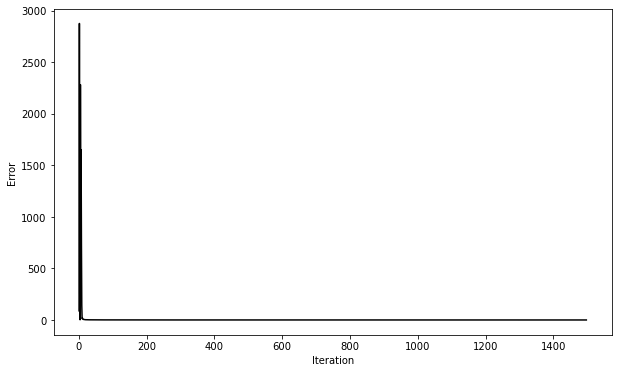

In [13]:
# Plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [14]:
# Calculate confusion matrix for training data
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, np.array(training_labels_set), rownames = ['y_predicted'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth       1   2   3   4   5
y_predicted                    
1            25   0   0   0   0
2             0  25   0   0   0
3             0   0  25   0   0
4             0   0   0  25   0
5             0   0   0   0  25


In [15]:
# Calculate confusion matrix for test data
Y_predicted_test = sigmoid(test_set, W, w0)
y_predicted_test = np.argmax(Y_predicted_test, axis = 1) + 1
confusion_matrix_test = pd.crosstab(y_predicted_test, np.array(test_labels_set), rownames = ['y_predicted'], colnames = ['y_test'])
print(confusion_matrix_test)

y_test        1   2   3   4   5
y_predicted                    
1            13   1   0   0   0
2             1  11   0   0   2
3             0   0  14   0   0
4             0   1   0  14   0
5             0   1   0   0  12
